<DIV ALIGN=CENTER>

# Introduction to Practical Concepts
## Professor Robert J. Brunner
  
</DIV>  
-----
-----


## Introduction

In this IPython Notebook, we explore 

1. Repeat unigram results (read in data/ set things up.)
2. stemming
3. Stemming results.
4. n-grams
5. bigram results
6. tri gram results.
7. results comparison (grid search?).

Sentiment analysis. Movie reviews?



-----

In [4]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

In [1]:
# load dataset
from sklearn.datasets import fetch_20newsgroups

train = fetch_20newsgroups(data_home='/home/data_scientist/data/textdm', subset='train', shuffle=True, random_state=23)
test = fetch_20newsgroups(data_home='/home/data_scientist/data/textdm', subset='test', shuffle=True, random_state=23)

## n-grams

Formally, a [_n-gram_][ngd] is a contiguous sequence of **n** items from a
parent sequence of items, such as characters or words in a text
document. In general, we will focus solely on words in a document. Thus,
our initial approach has simply been to look at unigrams or single
words in a document when building a classification model. However,
sometimes the combination of words can be more descriptive, for example,
_unbelievably bad_ is generally viewed as a more powerful description
than just _bad_. As a result, the concept of an _n-gram_ was created,
where collections of words can be treated as features. In fact google
allows a user to search for [specific n-gram][gnv] combinations in books that
they have scanned.

While this clearly can improve classification power, it also increases
computational requirements. This is a result of the exponential rise in
the number of possible features. For example, given $n$ words, we have
$n \times (n - 1)$ possible bigrams, and so on for higher order
combinations. While this is not a problem for small vocabularies, for
larger vocabularies (and corresponding documents) the number of possible
features can quickly become very large. Thus, many text mining
applications will make use of Hadoop or Spark clusters to leverage the
inherent parallelism in these tasks.

To demonstrate using n-grams, the following code example builds a
feature vector containing both ingle words and b-grams from the
documents. We use this new sparse matrix to classify the documents by
using our simple Naive Bayes classifier, which obtains slightly better
results.

-----
[gnv]: https://books.google.com/ngrams
[ngd]: https://en.wikipedia.org/wiki/N-gram

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

##### Make a Pipeline. Then modify only the pipeline as we go from uni-bi-tri grams.

cv = CountVectorizer(stop_words = 'english', ngram_range=(1,2))
train_counts = cv.fit_transform(train['data'])
test_data = cv.transform(test['data'])

from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(train_counts, train['target'])

predicted = clf.predict(test_data)

print("NB prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))

NB prediction accuracy =  80.4%


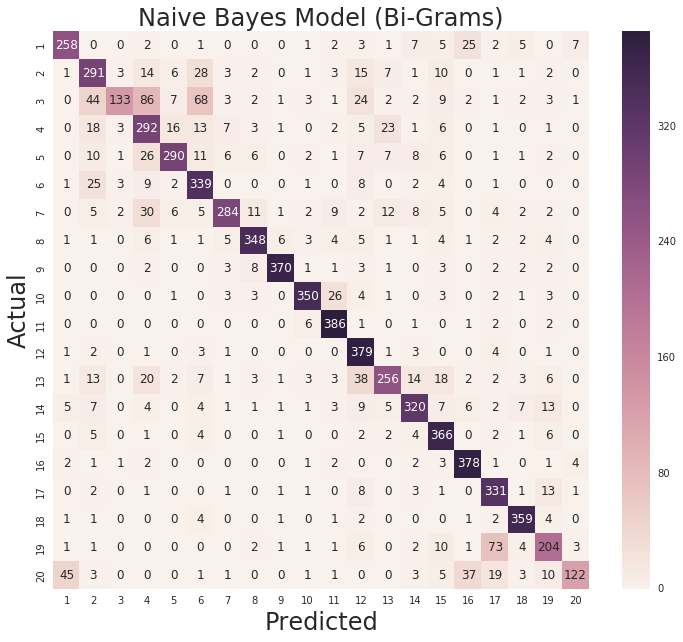

In [6]:
sns.set(style="white", context='paper', font='monospace')
sns.set(font_scale=1.0)
fig, ax = plt.subplots(figsize=(12, 10))

from helper_code import mlplots as mp
mp.confusion(test['target'], predicted, range(1, 21), 20, 'Naive Bayes Model (Bi-Grams)')
